Here are the main criteria to determine when to stop gradient descent:   
- Change Threshold     
Stop when the change in the loss function is less than a predefined threshold (ϵ).               
This means : ∣Lnew − Lold∣ <ϵ     ` Where`    
: Lnew is the loss after the latest update.       
: Lold is the loss from the previous iteration.   
: ϵ is a small positive number that you set to determine what constitutes a "small" change.   
- Maximum Number of Iterations : Set a maximum number of iterations (epochs) to avoid infinite training. If this limit is reached, stop the optimization.
 

Gradient_decent from scratch 



This line of code generates a simple regression dataset using the make_regression function from the sklearn.datasets module in Python.      
n_samples=4: This specifies the number of samples (data points) to generate. In this case, it will create 4 samples.              
n_features=1: This indicates the number of features (input variables) for each sample. Here, there is only 1 feature.                                        
n_informative=1: This defines how many of the features are informative for predicting the target variable. In this case, the single feature is informative.     
n_targets=1: This specifies the number of target variables to generate. Here, only 1 target variable is produced.        
noise=80: This parameter adds random noise to the output. A higher value increases the variability in the target values, making the data more challenging to fit.    
random_state=13: This is a seed for the random number generator, ensuring that the results can be reproduced. Using the same seed will generate the same dataset every time.   

The choice of random_state=13 is arbitrary; it can be any integer. The key purpose of setting a random state (or seed) is to ensure reproducibility. Using the same seed value allows you to generate the same random numbers each time you run the code, making your results consistent.    
You can use any integer, such as 0, 1, 42, or even 12345. The specific value doesn’t matter as long as you use the same value when you want to replicate the results. The number 13 is just a commonly used example.    

In [155]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

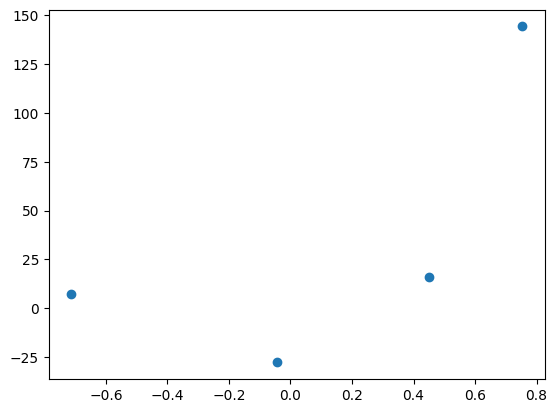

In [156]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.scatter(x,y)

In [157]:
# let Apply OLS
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [158]:
print("Coefficient is (slop) : ",reg.coef_)
print("Intercept is : ", reg.intercept_)

Coefficient is (slop) :  [78.35063668]
Intercept is :  26.15963284313262


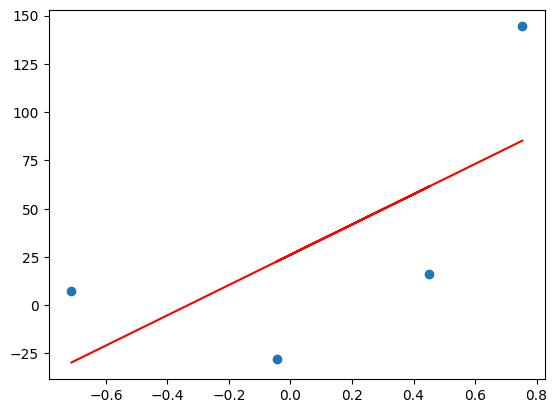

In [159]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color="red")

Lets apply the GD assuming slop is constant m = 78.35  
and it's assume the starting value for intercept b = 0

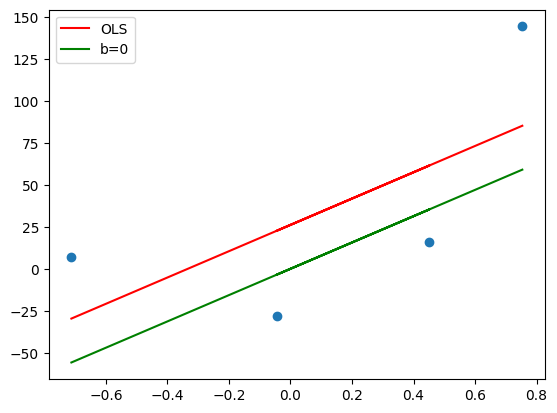

In [160]:
y_pred = ((78.35*x) + 0).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='green', label='b=0')
plt.legend()
plt.show()

The ravel() function in numpy is commonly used in ML for reshaping array into 1D fromate. 

In [161]:
m = 78.35
b = 0

loss_slop = -2*np.sum(y-m*x.ravel()-b)
print(loss_slop )

-209.27763408209216


In [162]:
# Let's learing rate is = 0.1
lr = 0.1
step_size = loss_slop*lr
step_size

np.float64(-20.927763408209216)

In [163]:
# Calculate the new intercept 
b = b-step_size
b 

np.float64(20.927763408209216)

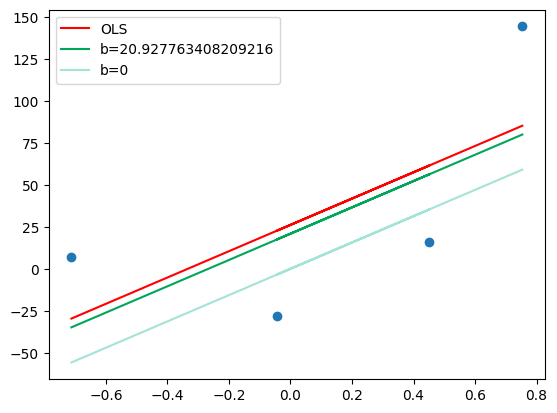

In [164]:
y_pred1 = ((78.35*x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred1, color='#00a65a', label='b={}'.format(b))
plt.plot(x, y_pred, color='#A3E4D7', label='b=0')
plt.legend()
plt.show()

In [165]:
# Iteration 2
loss_slop = -2*np.sum(y-m*x.ravel()-b)
step_size = loss_slop*lr
b = b-step_size

loss_slop, step_size, b

(np.float64(-41.85552681641843),
 np.float64(-4.185552681641844),
 np.float64(25.11331608985106))

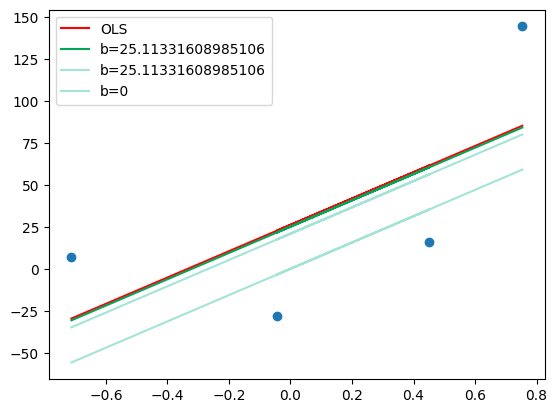

In [166]:
y_pred2 = ((78.35*x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred2, color='#00a65a', label='b={}'.format(b))
plt.plot(x, y_pred1, color='#A3E4D7', label='b={}'.format(b))
plt.plot(x, y_pred, color='#A3E4D7', label='b=0')
plt.legend()
plt.show()

In [167]:
# Iteration 3
loss_slop = -2*np.sum(y-m*x.ravel()-b)
step_size = loss_slop*lr
b = b-step_size

loss_slop, step_size, b

(np.float64(-8.371105363283675),
 np.float64(-0.8371105363283675),
 np.float64(25.95042662617943))

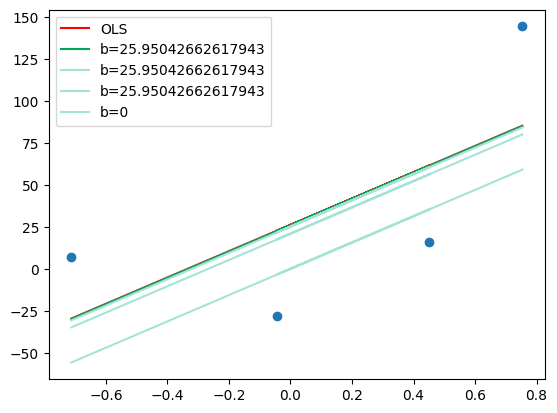

In [168]:
y_pred3 = ((78.35*x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred3, color='#00a65a', label='b={}'.format(b))
plt.plot(x, y_pred2, color='#A3E4D7', label='b={}'.format(b))
plt.plot(x, y_pred1, color='#A3E4D7', label='b={}'.format(b))
plt.plot(x, y_pred, color='#A3E4D7', label='b=0')
plt.legend()
plt.show()

,   
,    
,   

Creating the code using the loop 

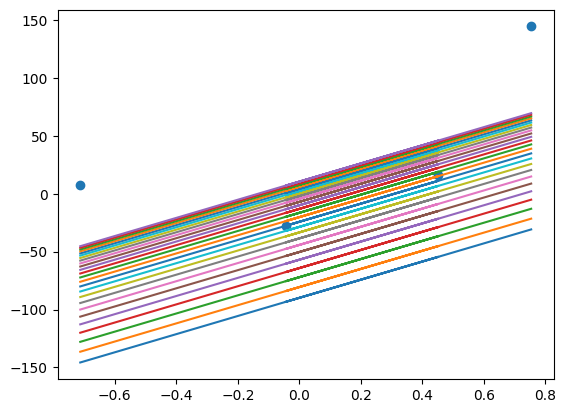

In [169]:
b = -100
m = 78.35
lr = 0.01

epochs = 25
for i in range(epochs):
    loss_slop = -2*np.sum(y-m*x.ravel()-b)
    b = b-(lr*loss_slop)

    y_pred = m*x+b
    plt.plot(x,y_pred)

plt.scatter(x,y)

Create a class of GD Regresser  
and crate two method 1st 'fit' and second would be 'pridict'

only b(intercept) calculate logic 

In [170]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np 

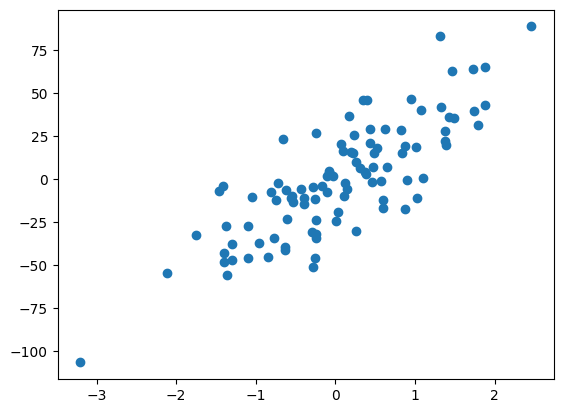

In [171]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)
plt.scatter(x,y)

In [176]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [177]:
print(lr.coef_)
print(lr.intercept_)

[27.04177986]
-1.8426001763600848


In [182]:
m = 29.19

In [213]:
class GDRegresser:

    def __init__(self, learning_rate, epochs):  
        self.m = 29.19
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, x, y):
        # Calculate b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m * x.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slop, self.b)
        print(self.b)

In [214]:
gd = GDRegresser(0.01, 10)
gd.fit(x, y)

-136.43270994361623 116.03440466631264
-136.43270994361623 -120.0
-136.43270994361623 116.03440466631264
-136.43270994361623 -120.0
-136.43270994361623 116.03440466631264
-136.43270994361623 -120.0
-136.43270994361623 116.03440466631264
-136.43270994361623 -120.0
-136.43270994361623 116.03440466631264
-136.43270994361623 -120.0
-120.0


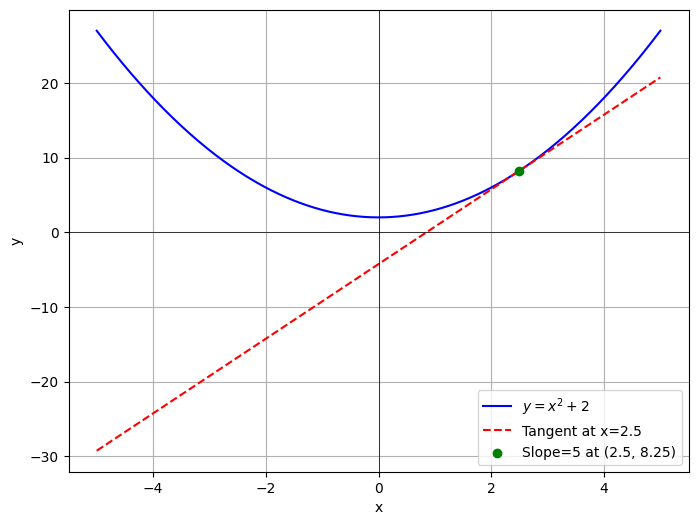

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
def f(x):
    return x**2 + 2

# Generate x values
x = np.linspace(-5, 5, 400)
y = f(x)

# Find point where slope is 5
x_slope = 2.5
y_slope = f(x_slope)
slope = 2 * x_slope  # Derivative at x=2.5

# Equation of tangent line: y = mx + c
c = y_slope - slope * x_slope
tangent_line = slope * x + c

# Plotting
plt.figure(figsize=(8,6))
plt.plot(x, y, label=r'$y = x^2 + 2$', color='blue')  # Parabola
plt.plot(x, tangent_line, '--', color='red', label='Tangent at x=2.5')  # Tangent line
plt.scatter(x_slope, y_slope, color='green', zorder=3, label=f'Slope=5 at ({x_slope}, {y_slope})')

# Labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()

# Show plot
plt.show()


math for the slop and more, 
is imp to make rich is fast, otherwise the world is grow repadelly, jalt he sifi movie ke tarah real me badal jayega.. it's true.. but not, i gess true, 
non rich country, kuch nhi kr payege.   
clode for code..... 
new sim...


((bnew = bold - slope )) equation, this is gradient decent.


when to stop --- 
if 
LR---

mathmaticall....... 

